# `Machine Learning Engineer Nanodegree`
------
## `Capstone Project` : Flight Delay Prediction

---
The Flight This MLND Capstone Project for . In this we will use DOT's dataset.

## `Import All the Libraries` 

In [1]:
# Importing all the libraries required for Flight Delay Prediction Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
import seaborn as sns
from datetime import datetime as dt  
from utils.MlUtils import MlUtils ,convert_time ,concat_date_time ,concat_date_time_ARRIVAL, concat_date_time_TaxiOut
from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score,auc
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Creating  instance of Utility class
ut=MlUtils()

## `Loading Datasets`

In [3]:
# Lading dataset from csv and printing their shape
dfAirlines = ut.load_csv('././data/airlines.csv', None)
dfAirports = ut.load_csv('././data/airports.csv', None)
dfFlights = ut.load_csv('././data/flights.csv', None)

In [4]:
dfFlights.shape, dfAirlines.shape,  dfAirports.shape

((5819079, 31), (14, 2), (322, 7))

In [5]:
# Showing first 3 airline name and IATA code
dfAirlines.head(3)

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.


In [6]:
# Showing airport details
dfAirports.head(3)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919


In [7]:
# Showing first 3 sample of flight dataframe
dfFlights.head(3)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### `Flights Dataset` 
Flights dataset has multiple feature, Some of them are time of day, some are just mintues and some of them none time valuse. But in csv all are in numeric and string  format.

Time of Days :
- ARRIVAL_TIME
- DEPARTURE_TIME
- SCHEDULED_DEPARTURE
- WHEELS_ON
- WHEELS_OFF
- SCHEDULED_ARRIVAL

Time in Minutes:

- DEPARTURE_DELAY
- TAXI_IN 
- TAXI_OUT
- SCHEDULED_TIME
- ELAPSE_TIME
- AIR_TIME
- ARRIVAL_DELAY
- AIR_SYSTEM_DELAY
- SECURITY_DELAY
- AIRLINE_DELAY
- LATE_AIRCRAFT_DELAY

None Time Values:
- AIRLINE 
- FLIGHT_NUMBER
- TAIL_NUMBER
- ORIGIN_AIRPORT
- DESTINATION_AIRPORT
- YEAR
- MONTH
- DAY
- DAY_OF_WEEK

Target Feature:

- AIRLINE_DELAY: It's difference between SCHEULED_ARRIVAL and ARRIVAL_TIME.


### `Data type Analyzing`
- We are displaying data type of every feature in flights dataset. This will help in understadning of data and further analysis. 

In [8]:
dfFlights.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

### `Utility Method`
This method will help in creating dictonary in pandas with Key vlaue pair. 
- The dect_obj is a dictionary empty object, we will add in this as key: value pair.
- IATA_CODE: AIRLINE
- Latter-on, in flight details dataframe we will replace IATA code with actual Name.


In [9]:
#Create Dictonary from dataset
def create_dict(dfObj):
    dict_obj={}
    for index, row in dfObj.T.iteritems():
        dict_obj.update({row[0]:row[1]})
    return dict_obj 

In [10]:
airline_dict=create_dict(dfAirlines)
dfFlights["AIRLINE_NAME"]=dfFlights['AIRLINE'].map(airline_dict)
dfFlights.head(3)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_NAME
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,US Airways Inc.


## `Target Feature`

In the below section, we will drive one feature `FLIGHT_DELAY`. Which will be our target feature for Machine Learning Model. It will be drive from `ARRIVAL_DELAY` feature in flights dataset. `ARRIVAL_DELAY` is flight delay in arrival on Destination Airport. It's a numeric value, we will convert it to binary `YES` or `NO`.

- `YES`: Delay
- `NO`: One Time

In [11]:
t2=dt.now()
dfFlights['FLIGHT_DELAY'] = dfFlights['ARRIVAL_DELAY'].map( lambda x : 'YES' if x>0 else 'NO')
print(dfFlights.shape)
print(dt.now() -t2)

(5819079, 33)
0:00:02.032183


In [12]:
dfFlights.shape, dfAirlines.shape,  dfAirports.shape

((5819079, 33), (14, 2), (322, 7))

#### `Missing Values in DataSet`
`Calculating Percentage of the Missing values in dataset`
- In the below section, we will count missing values of all feature and will calculate the % of missing values.
- So in case, high degree of missing percentage of values, we will remove that particular feature.

In [13]:
ut.sample_count=dfFlights.shape[0]
ut.missingPercent(dfFlights)

                     COUNT_OF_MISSING  COUNT_OF_MISSING_%
FEATURE                                                  
YEAR                                0            0.000000
MONTH                               0            0.000000
DAY                                 0            0.000000
DAY_OF_WEEK                         0            0.000000
AIRLINE                             0            0.000000
FLIGHT_NUMBER                       0            0.000000
TAIL_NUMBER                     14721            0.252978
ORIGIN_AIRPORT                      0            0.000000
DESTINATION_AIRPORT                 0            0.000000
SCHEDULED_DEPARTURE                 0            0.000000
DEPARTURE_TIME                  86153            1.480526
DEPARTURE_DELAY                 86153            1.480526
TAXI_OUT                        89047            1.530259
WHEELS_OFF                      89047            1.530259
SCHEDULED_TIME                      6            0.000103
ELAPSED_TIME  

## `Visualization`
We have to understand our data for getting best result from Machine Leanring Model. Visualiazaiton is the best way for it.
In below seciton, we will do visualization of data for analysis and intuition.

In [14]:
# Counting number of samples per class
# Number of sample per class. This will help in understanding  the nature of data. Is it balanced or imblance?
sample_per_class=dfFlights['FLIGHT_DELAY'].groupby(dfFlights['FLIGHT_DELAY']).count()
sample_per_class

FLIGHT_DELAY
NO     3732183
YES    2086896
Name: FLIGHT_DELAY, dtype: int64

In [15]:
# Creating new dataset only for delayed flights
delay_flights=dfFlights[dfFlights['FLIGHT_DELAY']=='YES']
print("Total flights: {}". format(dfFlights.shape[0]))
print("Total delay flights: {}". format(delay_flights.shape[0]))
print("Percentage of flights delay {}".format((delay_flights.shape[0]/dfFlights.shape[0])*100))

Total flights: 5819079
Total delay flights: 2086896
Percentage of flights delay 35.8629948141278


### `Histogram`
It will help in undersating in respect to sample per class.

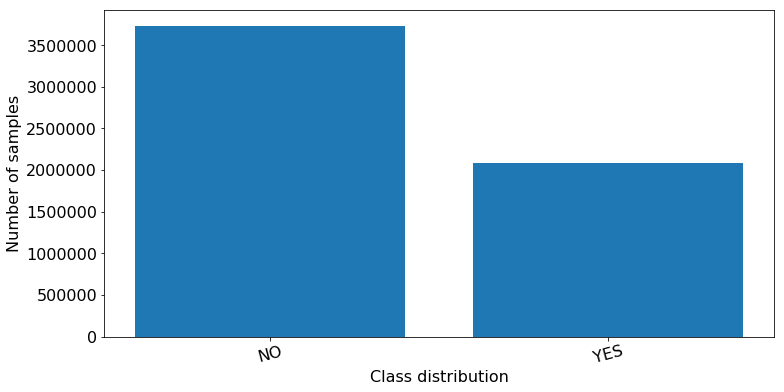

In [16]:
font = {'size'   : 16}
plt.rc('font', **font) 
fig, ax=plt.subplots(figsize=(12,6))
sample_per_delay_class=dfFlights['FLIGHT_DELAY'].groupby(dfFlights['FLIGHT_DELAY']).count()
x=sample_per_delay_class.index.values
ax.bar(x,sample_per_delay_class,align='center', label=['On-Time', 'Delayed Flight']) 
ax.set_ylabel('Number of samples')
ax.set_xlabel('Class distribution')
ax.set_xticks(x)
ax.set_xticklabels(x, rotation = 15) 
plt.show()

`In the above bar chart it's clearly shown, that the dataset is very much imbalanced. But it's not going to impact much. Because we have high number of sample for every class. `

In [17]:
dfFlights.shape, dfAirlines.shape,  dfAirports.shape

((5819079, 33), (14, 2), (322, 7))

### `Drawing Bar Chart for Data Insight`
- This Bar chart will help us in understanding of flight delay and arrival on time. it will also give insight of airline. Which Airline has more possiblitily to get delay.

In [18]:

delay_by_airline=delay_flights['FLIGHT_DELAY'].groupby(dfFlights['AIRLINE_NAME']).count()
# print(delay_by_airline)
airline_flight_total=dfFlights['FLIGHT_DELAY'].groupby(dfFlights['AIRLINE_NAME']).count()
# print(airline_flight_total)

airlines = sorted(['United Air Lines Inc.', 'American Airlines Inc.', 'US Airways Inc.',
           'Frontier Airlines Inc.',    'JetBlue Airways',       'Skywest Airlines Inc.',
           'Alaska Airlines Inc.',    'Spirit Air Lines',       'Southwest Airlines Co.',
           'Delta Air Lines Inc.',    'Atlantic Southeast Airlines',  'Hawaiian Airlines Inc.',
           'American Eagle Airlines Inc.',        'Virgin America'])

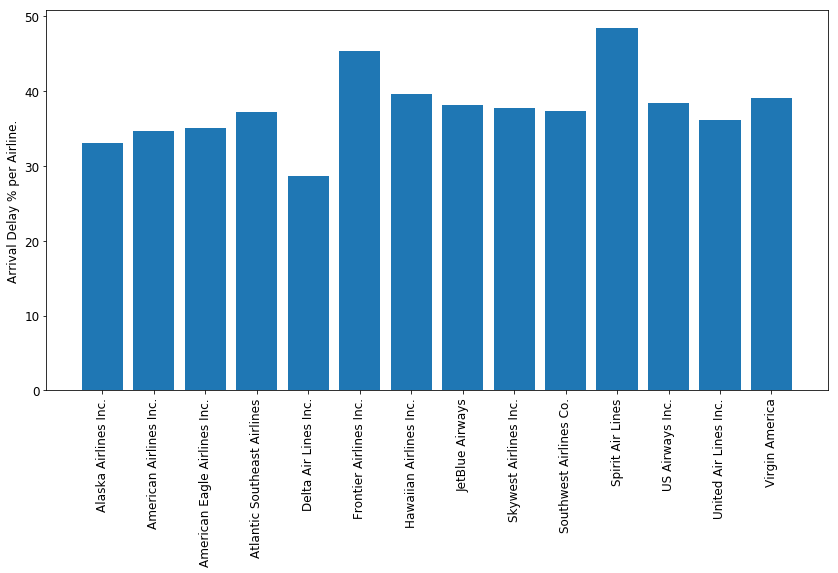

In [19]:
font = {'size'   : 12}
plt.rc('font', **font)
airline_delay_frac=np.divide(delay_by_airline, airline_flight_total)
x_axis=airline_delay_frac.index.values
# print(airline_delay_frac)
fig, ax=plt.subplots(figsize=(14,7))
ax.bar(x_axis, airline_delay_frac*100)
ax.set_ylabel('Arrival Delay % per Airline.')
ax.set_xticks(x_axis)
ax.set_xticklabels(airlines,rotation=90)
plt.show()

Above univariate Bar chart clearly Showing.

    Spirit Air Lines: Has high possibility of getting delay
    Delta Air Lines Inc.: In Compression to other, it has lest possibility of getting delay. 


In [20]:
# Converting Days number to Categorical
days_arr={1:'SUNDAY',2:'MONDAY',3:'TUESDAY',4:'WEDNESDAY',5:'THRUSDAY',6:'FRIDAY',7:'SATURDAY',}
dfFlights['DAY_OF_WEEK_NAME']=dfFlights['DAY_OF_WEEK'].map(days_arr)

In [21]:
delay_flights.loc[:,'DAY_OF_WEEK_NAME']=delay_flights.loc[:,'DAY_OF_WEEK'].map(days_arr)

C:\Users\S727953\AppData\Local\Continuum\anaconda3\envs\MLND_AI\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\S727953\AppData\Local\Continuum\anaconda3\envs\MLND_AI\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [22]:
delay_flights.head(3)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_NAME,FLIGHT_DELAY,DAY_OF_WEEK_NAME
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,0,NaN,NaN,NaN,NaN,NaN,NaN,US Airways Inc.,YES,WEDNESDAY
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,0,NaN,NaN,NaN,NaN,NaN,NaN,Delta Air Lines Inc.,YES,WEDNESDAY
14,2015,1,1,4,DL,2440,N651DL,SEA,MSP,40,...,0,NaN,NaN,NaN,NaN,NaN,NaN,Delta Air Lines Inc.,YES,WEDNESDAY


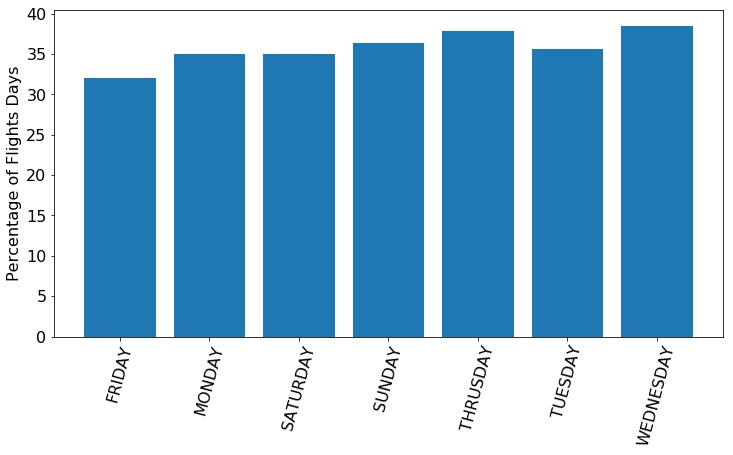

In [23]:
#Histogram for Delay per days
font = {'size'   : 16}
plt.rc('font', **font)

days_delays=delay_flights['FLIGHT_DELAY'].groupby(delay_flights['DAY_OF_WEEK_NAME']).count()
# print(days_delays)
days_totals=dfFlights['FLIGHT_DELAY'].groupby(dfFlights['DAY_OF_WEEK_NAME']).count()
# print(days_totals)
days_frac=np.divide(days_delays, days_totals)
# print(days_frac)

x=sorted(days_frac.index.values)
# print(x)
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fig, ax=plt.subplots(figsize=(12,6))
ax.bar(x,days_frac*100)
ax.set_ylabel('Percentage of Flights Days')
ax.set_xticks(x)
ax.set_xticklabels(x, rotation = 75)
plt.show()

The above plot will help in understanding in Day-wise delay in aircraft. What is the possibility of getting flight delay on particular day? 

The above graph is clearly showing that, on WEDNESDAY has highest possibility of flight delay and FRIDAY has least chance of delay.  

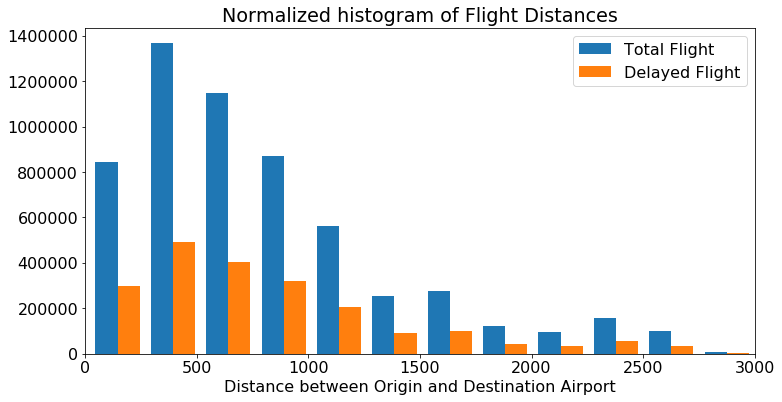

In [24]:
font = {'size'   : 16}
plt.rc('font', **font)

fig, ax = plt.subplots(figsize = (12,6))
ax.hist([dfFlights['DISTANCE'], delay_flights['DISTANCE']],   bins=20, label=['Total Flight', 'Delayed Flight'])
ax.set_xlim(0,3000)
ax.set_xlabel('Distance between Origin and Destination Airport')
ax.set_title('Normalized histogram of Flight Distances')
plt.legend()
plt.show()

 The above histogram is showing that, moreover shorter distance flight is getting delay more than long distance. 

In [25]:
dfFlights.shape, dfAirlines.shape,  dfAirports.shape

((5819079, 34), (14, 2), (322, 7))

### `Delay per Airline `

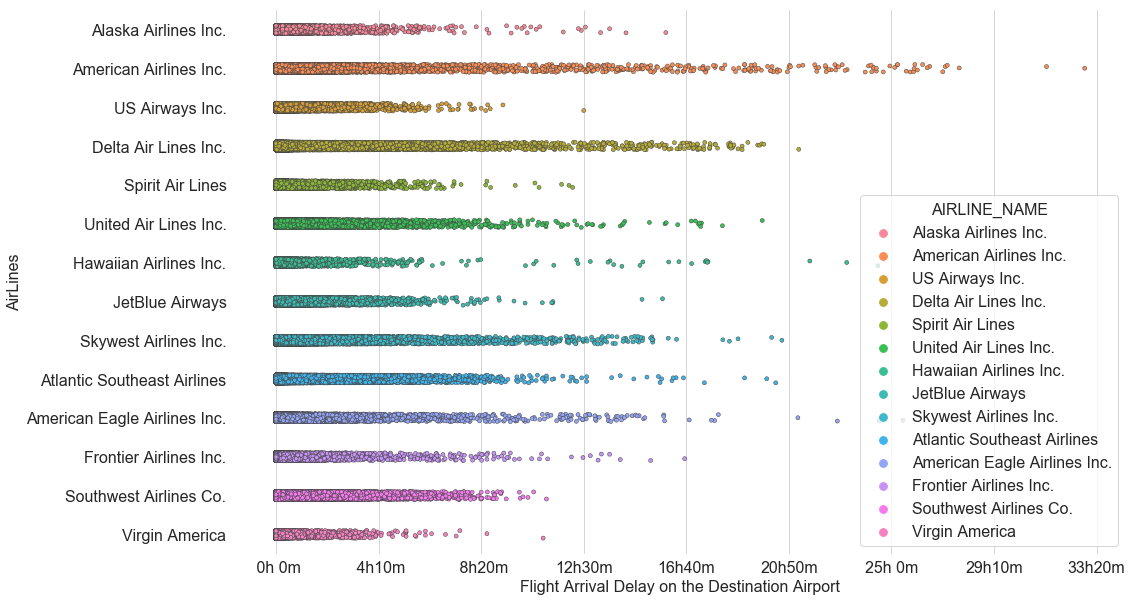

In [26]:
font = {'family' : 'normal', 'weight' : 'bold', 'size'   : 15}
sns.set_style('whitegrid')
# Initialize the Graph
fig_dim=(16,10)
fig, ax =plt.subplots(figsize=fig_dim)
sns.despine(bottom=True, left=True)

# Draw each observation with a scatterplot
sns.stripplot(x='AIRLINE_DELAY',y='AIRLINE_NAME', hue='AIRLINE_NAME',data=dfFlights , size=4,  linewidth = 0.5,  jitter=True)
plt.xlabel('Flight Arrival Delay on the Destination Airport')
plt.ylabel('AirLines')
ax.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in ax.get_xticks()])
ax.yaxis.label.set_visible(True)


`With the help of above scatter plot. We can say, American Airline is getting more delay in high number of time. Whereas virgin Airline flight is getting very less number of the time delay. ` 

### `Impect of Departure Delay on Flight Delay`

In [27]:
dfFlights.shape, dfAirlines.shape,  dfAirports.shape

((5819079, 34), (14, 2), (322, 7))

C:\Users\S727953\AppData\Local\Continuum\anaconda3\envs\MLND_AI\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\S727953\AppData\Local\Continuum\anaconda3\envs\MLND_AI\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


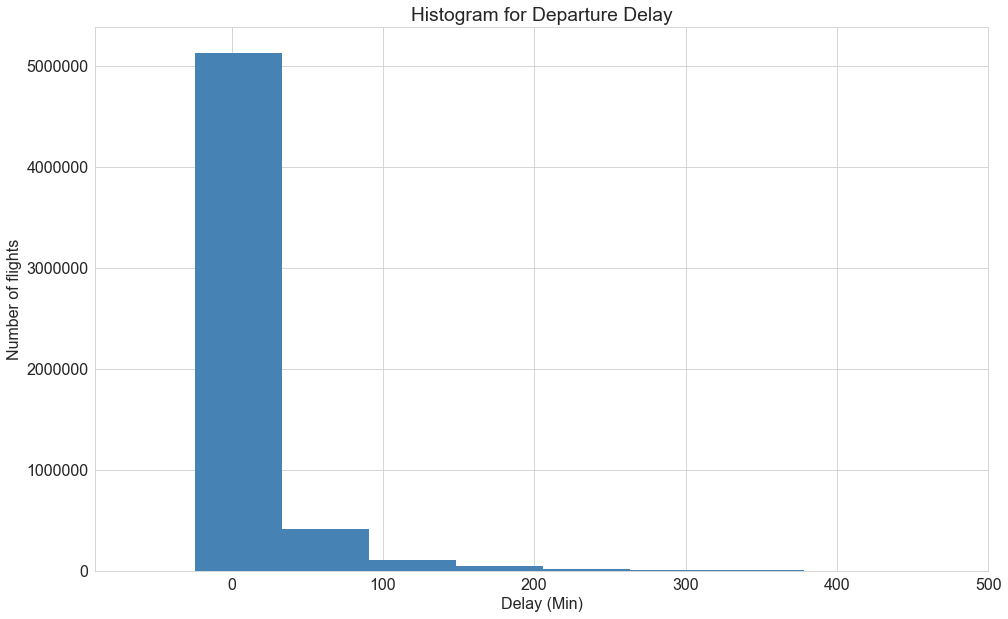

In [28]:
font = {'family' : 'normal', 'weight' : 'bold', 'size'   : 15}
sns.set_style('whitegrid')
# Initialize the Graph
fig_dim=(16,10)
fig, ax =plt.subplots(figsize=fig_dim)

plt.hist(dfFlights['DEPARTURE_DELAY'], bins=int(180/5),   alpha=1,
         histtype='stepfilled', color='steelblue',
         edgecolor='none')
# print(min(dfFlights['DEPARTURE_DELAY']))
plt.xlim([-90,500])  
plt.title('Histogram for Departure Delay')
plt.ylabel('Number of flights')
plt.xlabel('Delay (Min)')
plt.show()

In [29]:
dfFlights_corr=dfFlights.corr() 

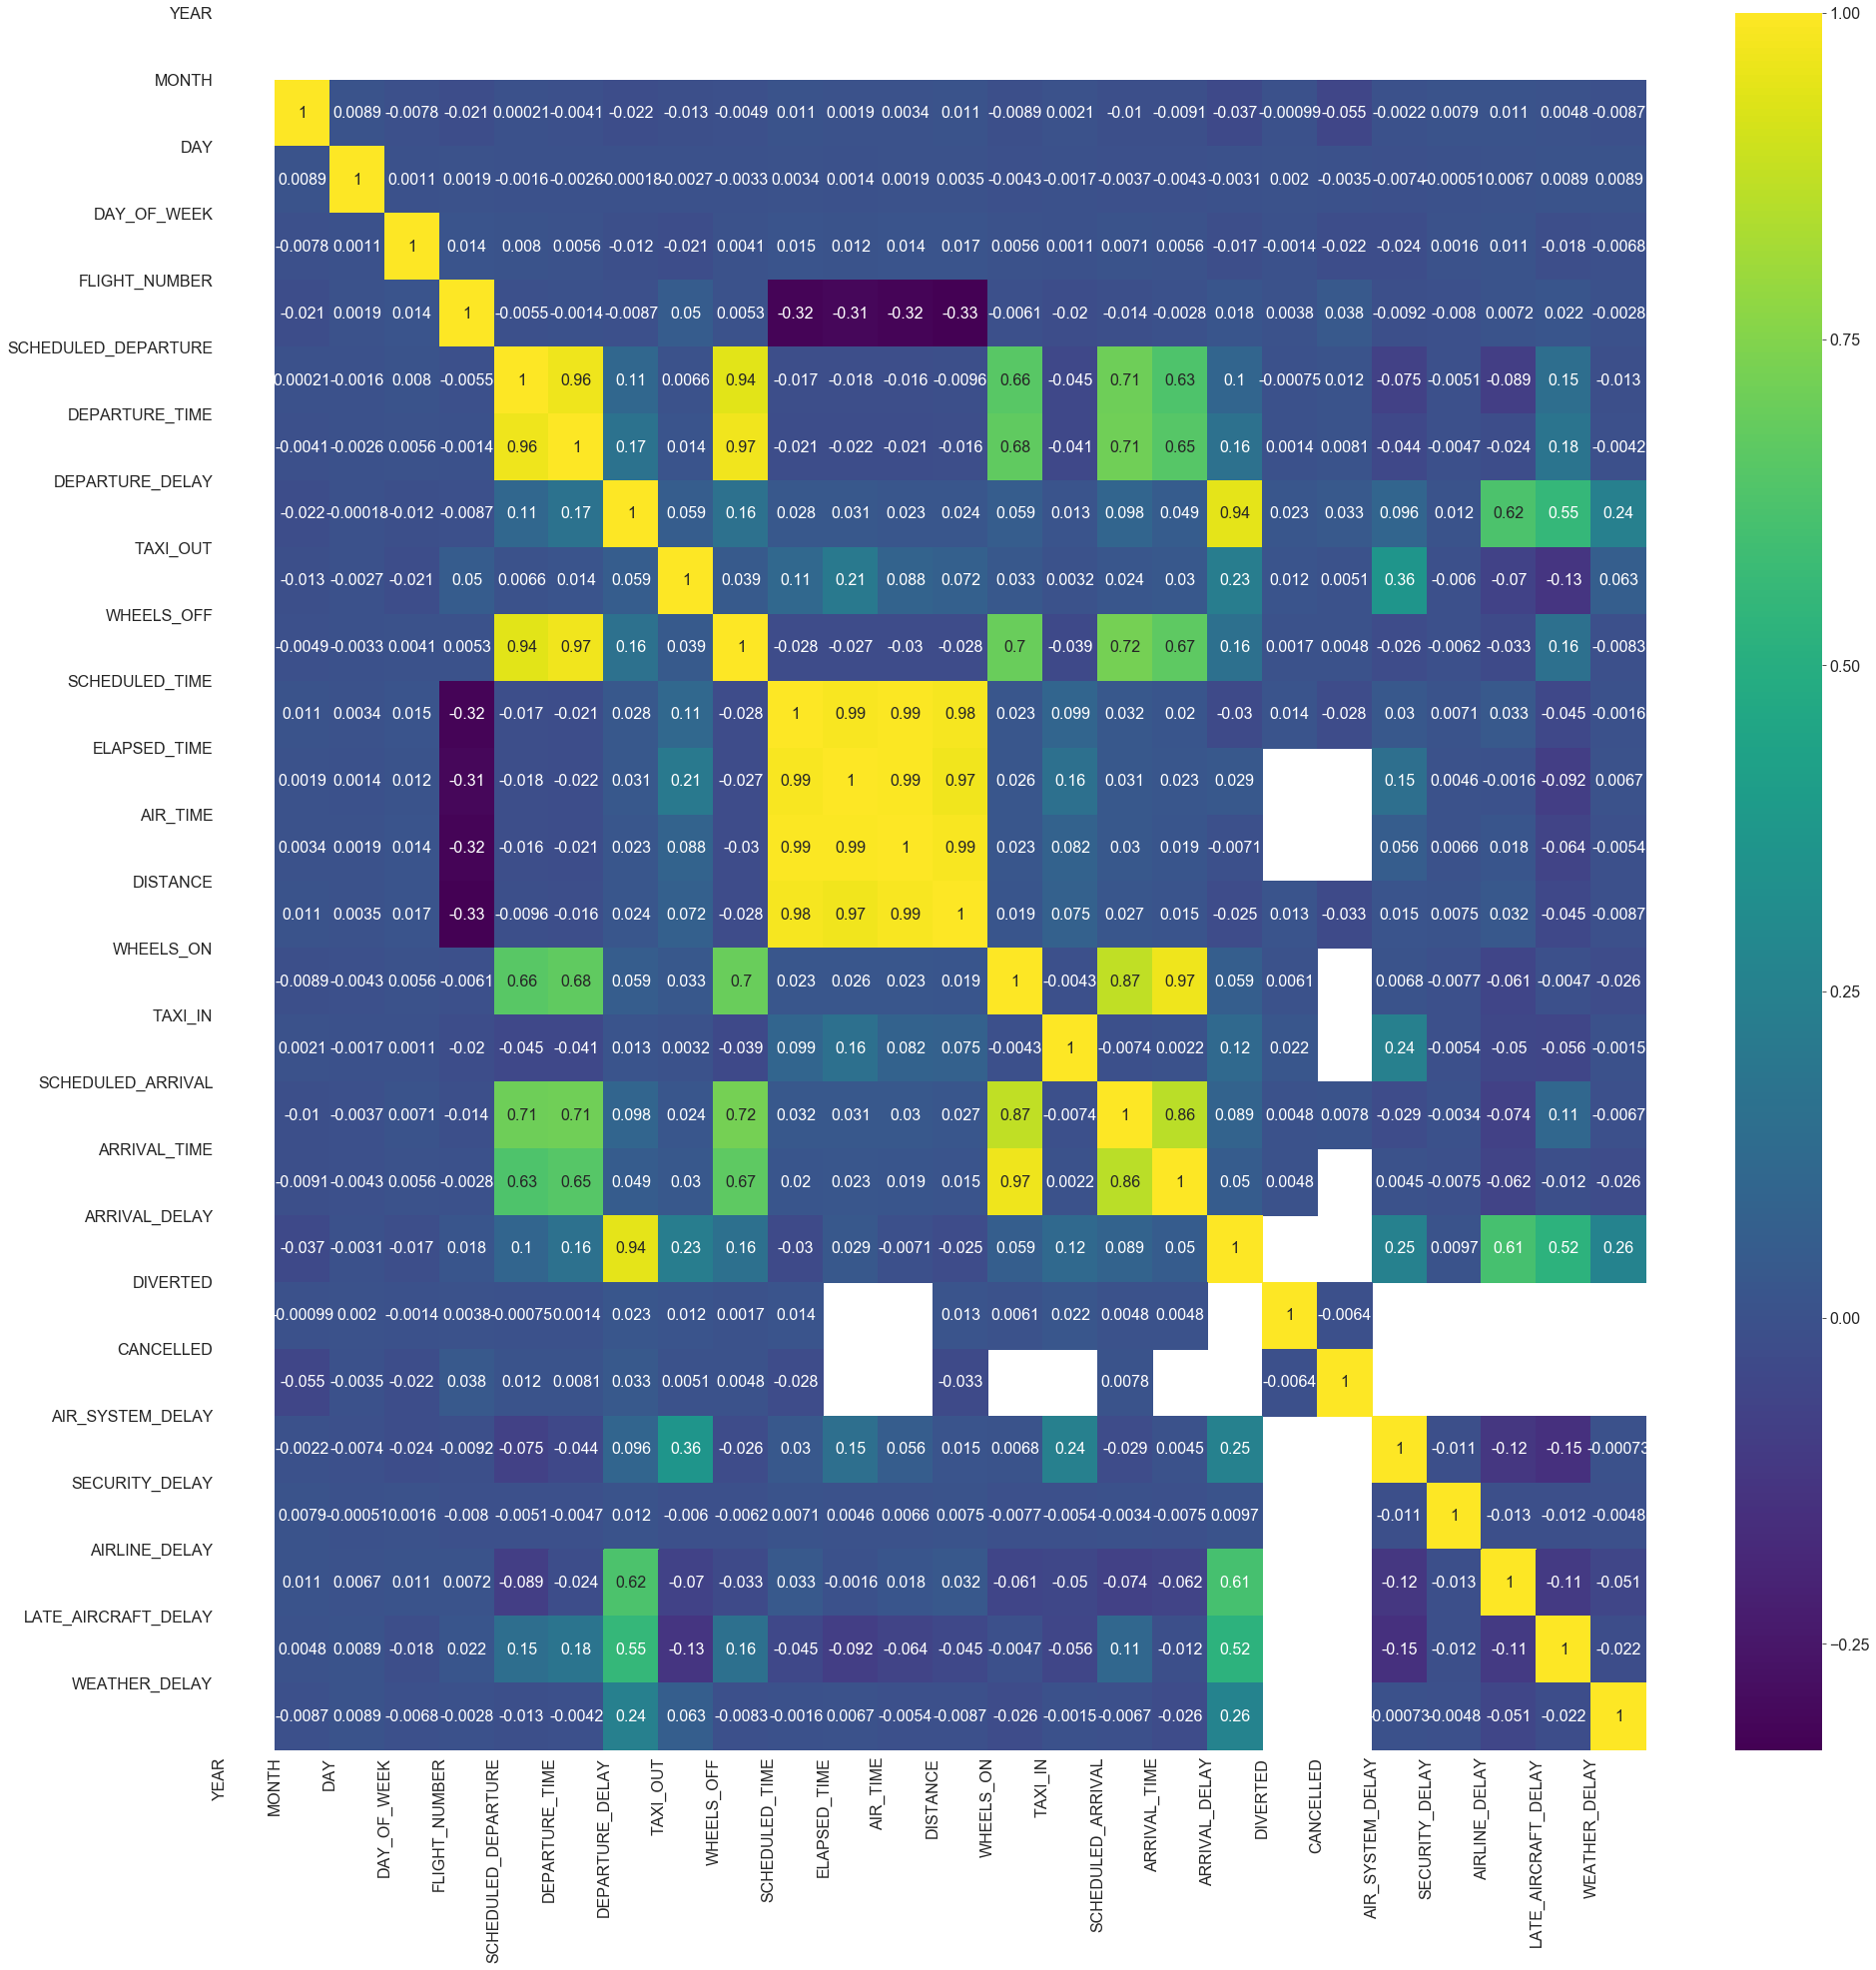

In [30]:
fig, ax = plt.subplots(figsize=(32, 32))
# ax.matshow(dfFlights_corr)
sns.heatmap(dfFlights_corr, annot=True,  cmap='viridis')
plt.xticks(range(len(dfFlights_corr.columns)), dfFlights_corr.columns);
ax.set_xticklabels( dfFlights_corr.columns, rotation = 90)
plt.yticks(range(len(dfFlights_corr.columns)), dfFlights_corr.columns);

In [31]:
print(ut.missingPercent(dfFlights))

                     COUNT_OF_MISSING  COUNT_OF_MISSING_%
FEATURE                                                  
YEAR                                0            0.000000
MONTH                               0            0.000000
DAY                                 0            0.000000
DAY_OF_WEEK                         0            0.000000
AIRLINE                             0            0.000000
FLIGHT_NUMBER                       0            0.000000
TAIL_NUMBER                     14721            0.252978
ORIGIN_AIRPORT                      0            0.000000
DESTINATION_AIRPORT                 0            0.000000
SCHEDULED_DEPARTURE                 0            0.000000
DEPARTURE_TIME                  86153            1.480526
DEPARTURE_DELAY                 86153            1.480526
TAXI_OUT                        89047            1.530259
WHEELS_OFF                      89047            1.530259
SCHEDULED_TIME                      6            0.000103
ELAPSED_TIME  

In [32]:
dfFlights.shape, dfAirlines.shape,  dfAirports.shape

((5819079, 34), (14, 2), (322, 7))

## `Droping Features`
- `FLIGHT_NUMBER`: This a unique identifier for the flight. 
- `TAIL_NUMBER`: This is also a unique identifier number for flight. It's called aircraft registration number.
- `CANCELLATION_REASON`, `AIR_SYSTEM_DELAY`,  `SECURITY_DELAY`, `AIRLINE_DELAY`, `LATE_AIRCRAFT_DELAY`, `WEATHER_DELAY`: These all th feature, we will get after arrival on destinaiton airport. So i am removing them.

In [33]:
print(dfFlights.columns) 
variables_to_remove=['FLIGHT_NUMBER','TAIL_NUMBER','CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',  'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 
              'WEATHER_DELAY']
dfFlights.drop(variables_to_remove, axis=1, inplace=True)
print(dfFlights.columns) 

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'AIRLINE_NAME', 'FLIGHT_DELAY',
       'DAY_OF_WEEK_NAME'],
      dtype='object')
Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED',
       'CANCEL

In [34]:
dfFlights.shape, dfAirlines.shape,  dfAirports.shape

((5819079, 26), (14, 2), (322, 7))

###  Drived Features
- I will drive a feature `FLIGHT_DATE`, which will be combination of our dataframe's three feature `YEAR`,`MONTH`,`DAY`.It will drive flight journy date.
- And later on we will remove these three feature from our dataset. 

In [35]:
t2=dt.now()
dfFlights['FLIGHT_DATE'] = pd.to_datetime(dfFlights[['YEAR', 'MONTH', 'DAY']])
print(dt.now() -t2)

0:00:05.594494


In [36]:
dfFlights.shape, dfAirlines.shape,  dfAirports.shape

((5819079, 27), (14, 2), (322, 7))

## `Feature Selection with Importance`

`Dataset in flights.csv is high in volume `(~5819079)`. For computing, it will require high computation power and time. So for this project we are going to use only one month data. `


In [37]:
dfFlight=dfFlights[dfFlights['MONTH']==1]
dfFlights=dfFlights[dfFlights['MONTH']==1]

# dfFlight=dfFlight.iloc[:69968,:]

In [38]:
dfFlight.shape, dfFlights.shape, dfAirlines.shape,  dfAirports.shape

((469968, 27), (469968, 27), (14, 2), (322, 7))

In [39]:
dfFlights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,...,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIRLINE_NAME,FLIGHT_DELAY,DAY_OF_WEEK_NAME,FLIGHT_DATE
0,2015,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,...,4.0,430,408.0,-22.0,0,0,Alaska Airlines Inc.,NO,WEDNESDAY,2015-01-01
1,2015,1,1,4,AA,LAX,PBI,10,2.0,-8.0,...,4.0,750,741.0,-9.0,0,0,American Airlines Inc.,NO,WEDNESDAY,2015-01-01
2,2015,1,1,4,US,SFO,CLT,20,18.0,-2.0,...,11.0,806,811.0,5.0,0,0,US Airways Inc.,YES,WEDNESDAY,2015-01-01
3,2015,1,1,4,AA,LAX,MIA,20,15.0,-5.0,...,8.0,805,756.0,-9.0,0,0,American Airlines Inc.,NO,WEDNESDAY,2015-01-01
4,2015,1,1,4,AS,SEA,ANC,25,24.0,-1.0,...,5.0,320,259.0,-21.0,0,0,Alaska Airlines Inc.,NO,WEDNESDAY,2015-01-01


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

clf = RandomForestClassifier(n_estimators=10, verbose=2)
feature_ls = ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
              'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME',
              'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'DIVERTED', 'CANCELLED' ]
le=LabelEncoder()

x=dfFlight[feature_ls]
y=dfFlight.FLIGHT_DELAY

ut.missingPercent(x)
x=x.fillna(0, axis=1)
ut.missingPercent(x)

x['AIRLINE']=le.fit_transform(x['AIRLINE'])
x['ORIGIN_AIRPORT']=le.fit_transform(x['ORIGIN_AIRPORT'])
x['DESTINATION_AIRPORT']=le.fit_transform(x['DESTINATION_AIRPORT']) 

                     COUNT_OF_MISSING  COUNT_OF_MISSING_%
FEATURE                                                  
YEAR                                0            0.000000
MONTH                               0            0.000000
DAY                                 0            0.000000
DAY_OF_WEEK                         0            0.000000
AIRLINE                             0            0.000000
ORIGIN_AIRPORT                      0            0.000000
DESTINATION_AIRPORT                 0            0.000000
DEPARTURE_DELAY                 11657            0.200324
TAXI_OUT                        11876            0.204087
WHEELS_OFF                      11876            0.204087
SCHEDULED_TIME                      0            0.000000
ELAPSED_TIME                    12955            0.222630
AIR_TIME                        12955            0.222630
DISTANCE                            0            0.000000
WHEELS_ON                       12271            0.210875
TAXI_IN       

In [41]:
clf.fit(x,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   15.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=2,
            warm_start=False)

In [42]:
columns=['FEATURE', 'IMPORTANCE']
selected_Feature=pd.DataFrame(columns=columns)
for  idx in range(len(clf.feature_importances_)):
    selected_Feature.loc[idx]=[feature_ls[idx] ,clf.feature_importances_[idx]]
selected_Feature.sort_values('IMPORTANCE', ascending=False)

,FEATURE,IMPORTANCE
7,DEPARTURE_DELAY,0.380051
8,TAXI_OUT,0.109573
10,SCHEDULED_TIME,0.084645
11,ELAPSED_TIME,0.068078
12,AIR_TIME,0.051044
15,TAXI_IN,0.050421
2,DAY,0.049596
9,WHEELS_OFF,0.043391
14,WHEELS_ON,0.038252
13,DISTANCE,0.037794


- `YEAR`, `MONTH`, `DAY` : We drived anohter feature by using them, So i am going to remove them.

In [43]:
variables_to_remove=['YEAR', 'MONTH', 'DAY']
dfFlights.drop(variables_to_remove, axis=1, inplace=True)

In [44]:
dfFlights.shape, dfAirlines.shape,  dfAirports.shape

((469968, 24), (14, 2), (322, 7))

In [45]:
dfFlights.head()

,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,...,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIRLINE_NAME,FLIGHT_DELAY,DAY_OF_WEEK_NAME,FLIGHT_DATE
0,4,AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,...,4.0,430,408.0,-22.0,0,0,Alaska Airlines Inc.,NO,WEDNESDAY,2015-01-01
1,4,AA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,...,4.0,750,741.0,-9.0,0,0,American Airlines Inc.,NO,WEDNESDAY,2015-01-01
2,4,US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,...,11.0,806,811.0,5.0,0,0,US Airways Inc.,YES,WEDNESDAY,2015-01-01
3,4,AA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,...,8.0,805,756.0,-9.0,0,0,American Airlines Inc.,NO,WEDNESDAY,2015-01-01
4,4,AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,...,5.0,320,259.0,-21.0,0,0,Alaska Airlines Inc.,NO,WEDNESDAY,2015-01-01


- `As dataset has two different format values (Minutes, time of day): Time of day are in float format(float64), first  2 digit are hour of day and last 2 digit are for minitue of hour. We will convert them in date format.`

In [46]:
dfFlights.shape, dfAirlines.shape,  dfAirports.shape

((469968, 24), (14, 2), (322, 7))

In [47]:
t4=dt.now()
dfFlights['SCHEDULED_DEPARTURE'] = dfFlights.apply(concat_date_time, axis=1)
dt.now() -t4

datetime.timedelta(0, 98, 334287)

In [48]:
t5=dt.now()
dfFlights['DEPARTURE_TIME'] = dfFlights['DEPARTURE_TIME'].map(convert_time)
(dt.now() -t5)

datetime.timedelta(0, 55, 98487)

In [49]:
dfFlights['SCHEDULED_ARRIVAL'].head(3)

0    430
1    750
2    806
Name: SCHEDULED_ARRIVAL, dtype: int64

In [50]:
t6=dt.now()
dfFlights['SCHEDULED_ARRIVAL'] =  dfFlights.apply(concat_date_time_ARRIVAL, axis=1)
print(dfFlights.columns)
print(dfFlights.shape)
print(dt.now() -t6)

Index(['DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'AIRLINE_NAME',
       'FLIGHT_DELAY', 'DAY_OF_WEEK_NAME', 'FLIGHT_DATE'],
      dtype='object')
(469968, 24)
0:01:40.203837


In [51]:
dfFlights.shape, dfAirlines.shape,  dfAirports.shape

((469968, 24), (14, 2), (322, 7))

In [52]:
dfFlights.dtypes

DAY_OF_WEEK                     int64
AIRLINE                        object
ORIGIN_AIRPORT                 object
DESTINATION_AIRPORT            object
SCHEDULED_DEPARTURE    datetime64[ns]
DEPARTURE_TIME                 object
DEPARTURE_DELAY               float64
TAXI_OUT                      float64
WHEELS_OFF                    float64
SCHEDULED_TIME                float64
ELAPSED_TIME                  float64
AIR_TIME                      float64
DISTANCE                        int64
WHEELS_ON                     float64
TAXI_IN                       float64
SCHEDULED_ARRIVAL      datetime64[ns]
ARRIVAL_TIME                  float64
ARRIVAL_DELAY                 float64
DIVERTED                        int64
CANCELLED                       int64
AIRLINE_NAME                   object
FLIGHT_DELAY                   object
DAY_OF_WEEK_NAME               object
FLIGHT_DATE            datetime64[ns]
dtype: object

In [53]:
# Total planned Journery Time 
dfFlights['TOTAL_JOURNERY_SCHEDULE_TIME']=dfFlights['SCHEDULED_ARRIVAL']- dfFlights['SCHEDULED_DEPARTURE']

In [54]:
dfFlights.shape, dfAirlines.shape,  dfAirports.shape

((469968, 25), (14, 2), (322, 7))

### `Missing % Per Column`

In [55]:
ut.missingPercent(dfFlights)

                              COUNT_OF_MISSING  COUNT_OF_MISSING_%
FEATURE                                                           
DAY_OF_WEEK                                  0            0.000000
AIRLINE                                      0            0.000000
ORIGIN_AIRPORT                               0            0.000000
DESTINATION_AIRPORT                          0            0.000000
SCHEDULED_DEPARTURE                          0            0.000000
DEPARTURE_TIME                           11691            0.200908
DEPARTURE_DELAY                          11657            0.200324
TAXI_OUT                                 11876            0.204087
WHEELS_OFF                               11876            0.204087
SCHEDULED_TIME                               0            0.000000
ELAPSED_TIME                             12955            0.222630
AIR_TIME                                 12955            0.222630
DISTANCE                                     0            0.00

In [56]:
dfFlights.shape, dfAirlines.shape,  dfAirports.shape

((469968, 25), (14, 2), (322, 7))

### `Removing Features which are less relevant`

- `ARRIVAL_DELAY` : Drived `FLIGHT_DELAY`
- `AIR_TIME` : This will be populated after landing. So it's not important feature for our model.
- `FLIGHT_DATE` : We will not use date directly, we will dirve some feature form it.
- `ARRIVAL_TIME` ,`WHEELS_ON`, `TAXI_IN` , `CANCELLED` : This will be populated after landing on airport.
- `WHEELS_ON` : The time point that the aircraft's wheels touch on the ground
- `TAXI_IN` : The time duration elapsed between wheels-on and gate arrival at the destination airport
- `ARRIVAL_TIME` : WHEELS_ON+TAXI_IN
- `ELAPSED_TIME` : AIR_TIME+TAXI_IN+TAXI_OUT 

In [57]:
dfFlights.columns

Index(['DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'AIRLINE_NAME',
       'FLIGHT_DELAY', 'DAY_OF_WEEK_NAME', 'FLIGHT_DATE',
       'TOTAL_JOURNERY_SCHEDULE_TIME'],
      dtype='object')

In [58]:
variables_to_remove=['ARRIVAL_DELAY','ELAPSED_TIME' , 'AIR_TIME', 'SCHEDULED_DEPARTURE','SCHEDULED_ARRIVAL',
                     'FLIGHT_DATE','ARRIVAL_TIME' , 'WHEELS_ON', 'TAXI_IN','CANCELLED'] 
dfFlights.drop(variables_to_remove, axis=1, inplace=True)
print(dfFlights.shape)

(469968, 15)


In [59]:
dfFlights.shape, dfAirlines.shape,  dfAirports.shape, dfFlights.columns

((469968, 15),
 (14, 2),
 (322, 7),
 Index(['DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
        'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
        'SCHEDULED_TIME', 'DISTANCE', 'DIVERTED', 'AIRLINE_NAME',
        'FLIGHT_DELAY', 'DAY_OF_WEEK_NAME', 'TOTAL_JOURNERY_SCHEDULE_TIME'],
       dtype='object'))

In [60]:
variables_to_remove=['DAY_OF_WEEK'] 
dfFlights.drop(variables_to_remove, axis=1, inplace=True)
print(dfFlights.shape)

(469968, 14)


In [61]:
dfFlights.shape, dfAirlines.shape,  dfAirports.shape, dfFlights.columns

((469968, 14),
 (14, 2),
 (322, 7),
 Index(['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_TIME',
        'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME',
        'DISTANCE', 'DIVERTED', 'AIRLINE_NAME', 'FLIGHT_DELAY',
        'DAY_OF_WEEK_NAME', 'TOTAL_JOURNERY_SCHEDULE_TIME'],
       dtype='object'))

In [62]:
# Converting Day_of_week in Catogical Feature 
delay_binary={'YES':0,'NO':1}

In [63]:
dfFlights['FLIGHT_DELAY']=dfFlights['FLIGHT_DELAY'].map(delay_binary)
dfFlights.head()

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,DIVERTED,AIRLINE_NAME,FLIGHT_DELAY,DAY_OF_WEEK_NAME,TOTAL_JOURNERY_SCHEDULE_TIME
0,AS,ANC,SEA,23:54:00,-11.0,21.0,15.0,205.0,1448,0,Alaska Airlines Inc.,1,WEDNESDAY,04:25:00
1,AA,LAX,PBI,00:02:00,-8.0,12.0,14.0,280.0,2330,0,American Airlines Inc.,1,WEDNESDAY,07:40:00
2,US,SFO,CLT,00:18:00,-2.0,16.0,34.0,286.0,2296,0,US Airways Inc.,0,WEDNESDAY,07:46:00
3,AA,LAX,MIA,00:15:00,-5.0,15.0,30.0,285.0,2342,0,American Airlines Inc.,1,WEDNESDAY,07:45:00
4,AS,SEA,ANC,00:24:00,-1.0,11.0,35.0,235.0,1448,0,Alaska Airlines Inc.,1,WEDNESDAY,02:55:00


#### Feature Engineering 
---
`We will convert all the time in minutes in Decimal`

- `ORIGIN_AIRPORT` `DESTINATION_AIRPORT` : `LAG_INFO`


In [64]:
dfFlights['LAG_INFO']= dfFlights['ORIGIN_AIRPORT']+ '--' +dfFlights['DESTINATION_AIRPORT']
dfFlights.shape, dfAirlines.shape,  dfAirports.shape, dfFlights.columns

((469968, 15),
 (14, 2),
 (322, 7),
 Index(['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_TIME',
        'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME',
        'DISTANCE', 'DIVERTED', 'AIRLINE_NAME', 'FLIGHT_DELAY',
        'DAY_OF_WEEK_NAME', 'TOTAL_JOURNERY_SCHEDULE_TIME', 'LAG_INFO'],
       dtype='object'))

In [65]:
dfFlights.shape, dfAirlines.shape,  dfAirports.shape, dfFlights.columns

((469968, 15),
 (14, 2),
 (322, 7),
 Index(['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_TIME',
        'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME',
        'DISTANCE', 'DIVERTED', 'AIRLINE_NAME', 'FLIGHT_DELAY',
        'DAY_OF_WEEK_NAME', 'TOTAL_JOURNERY_SCHEDULE_TIME', 'LAG_INFO'],
       dtype='object'))

In [66]:
# Removing because  We have drive the Flight_Delay  from  ARRIVAL_DELAY. So Arrival_Delay is no relevent more.
variables_to_remove=['DESTINATION_AIRPORT','ORIGIN_AIRPORT']
dfFlights.drop(variables_to_remove, axis=1, inplace=True)
print(dfFlights.shape)

(469968, 13)


In [67]:
print(dfFlights['LAG_INFO'].nunique())
dfFlights.head()

4170


,AIRLINE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,DIVERTED,AIRLINE_NAME,FLIGHT_DELAY,DAY_OF_WEEK_NAME,TOTAL_JOURNERY_SCHEDULE_TIME,LAG_INFO
0,AS,23:54:00,-11.0,21.0,15.0,205.0,1448,0,Alaska Airlines Inc.,1,WEDNESDAY,04:25:00,ANC--SEA
1,AA,00:02:00,-8.0,12.0,14.0,280.0,2330,0,American Airlines Inc.,1,WEDNESDAY,07:40:00,LAX--PBI
2,US,00:18:00,-2.0,16.0,34.0,286.0,2296,0,US Airways Inc.,0,WEDNESDAY,07:46:00,SFO--CLT
3,AA,00:15:00,-5.0,15.0,30.0,285.0,2342,0,American Airlines Inc.,1,WEDNESDAY,07:45:00,LAX--MIA
4,AS,00:24:00,-1.0,11.0,35.0,235.0,1448,0,Alaska Airlines Inc.,1,WEDNESDAY,02:55:00,SEA--ANC


- departure timeing AM/PM
- `SCHEDULED_DEPARTURE` : Planned Departure Time
- `DEPARTURE_TIME` : WHEEL_OFF - TAXI_OUT
- `DEPARTURE_DELAY` : Total Delay on Departure in Minutes
- `TAXI_OUT` : The time duration elapsed between departure from the origin airport gate and wheels off
- `WHEELS_OFF` : The time point that the aircraft's wheels leave the ground
- `SCHEDULED_TIME` : Planned time amount needed for the flight trip
- `AIR_TIME` : The time duration between wheels_off and wheels_on time
- `DISTANCE` : Distance between two airports

- `SCHEDULED_ARRIVAL` : Planned arrival time

- `ARRIVAL_DELAY` : ARRIVAL_TIME-SCHEDULED_ARRIVAL
- `DIVERTED` : Aircraft landed on airport that out of schedule

In [68]:
dfTests=dfFlights.loc[:5,:] 
dfTests['DEPARTURE_TIME_DECIMAL']=dfTests['TOTAL_JOURNERY_SCHEDULE_TIME'].map(lambda dt : np.nan if dt is None  else (dt.total_seconds()//3600 * 60) + (dt.total_seconds()%3600)/60)
dfFlights.shape

C:\Users\S727953\AppData\Local\Continuum\anaconda3\envs\MLND_AI\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(469968, 13)

In [69]:
dfFlights.shape, dfAirlines.shape,  dfAirports.shape, dfFlights.columns

((469968, 13),
 (14, 2),
 (322, 7),
 Index(['AIRLINE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
        'WHEELS_OFF', 'SCHEDULED_TIME', 'DISTANCE', 'DIVERTED', 'AIRLINE_NAME',
        'FLIGHT_DELAY', 'DAY_OF_WEEK_NAME', 'TOTAL_JOURNERY_SCHEDULE_TIME',
        'LAG_INFO'],
       dtype='object'))

In [70]:
# dfFlight = dfFlight.reindex(sorted(dfFlight.columns), axis=1)
dfFlights.head()

,AIRLINE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,DIVERTED,AIRLINE_NAME,FLIGHT_DELAY,DAY_OF_WEEK_NAME,TOTAL_JOURNERY_SCHEDULE_TIME,LAG_INFO
0,AS,23:54:00,-11.0,21.0,15.0,205.0,1448,0,Alaska Airlines Inc.,1,WEDNESDAY,04:25:00,ANC--SEA
1,AA,00:02:00,-8.0,12.0,14.0,280.0,2330,0,American Airlines Inc.,1,WEDNESDAY,07:40:00,LAX--PBI
2,US,00:18:00,-2.0,16.0,34.0,286.0,2296,0,US Airways Inc.,0,WEDNESDAY,07:46:00,SFO--CLT
3,AA,00:15:00,-5.0,15.0,30.0,285.0,2342,0,American Airlines Inc.,1,WEDNESDAY,07:45:00,LAX--MIA
4,AS,00:24:00,-1.0,11.0,35.0,235.0,1448,0,Alaska Airlines Inc.,1,WEDNESDAY,02:55:00,SEA--ANC


In [71]:
dfFlights['JOURNEY_TIME']=dfFlights['TOTAL_JOURNERY_SCHEDULE_TIME'].map(lambda dt : np.nan if dt is None  else (dt.total_seconds()//3600 * 60) + (dt.total_seconds()%3600)/60)

In [72]:
dfFlights.dtypes

AIRLINE                                  object
DEPARTURE_TIME                           object
DEPARTURE_DELAY                         float64
TAXI_OUT                                float64
WHEELS_OFF                              float64
SCHEDULED_TIME                          float64
DISTANCE                                  int64
DIVERTED                                  int64
AIRLINE_NAME                             object
FLIGHT_DELAY                              int64
DAY_OF_WEEK_NAME                         object
TOTAL_JOURNERY_SCHEDULE_TIME    timedelta64[ns]
LAG_INFO                                 object
JOURNEY_TIME                            float64
dtype: object

In [73]:
feature_ls=['TOTAL_JOURNERY_SCHEDULE_TIME','DEPARTURE_TIME','AIRLINE_NAME']
dfAirports.drop_duplicates();
dfFlights.drop(feature_ls,inplace=True,axis=1)

In [74]:
dfFlights.dtypes

AIRLINE              object
DEPARTURE_DELAY     float64
TAXI_OUT            float64
WHEELS_OFF          float64
SCHEDULED_TIME      float64
DISTANCE              int64
DIVERTED              int64
FLIGHT_DELAY          int64
DAY_OF_WEEK_NAME     object
LAG_INFO             object
JOURNEY_TIME        float64
dtype: object

## `Handling Missing Values`
There are multiple ways to handling missing values.
    
    1- Remove particular sample
    2- Reconstruct the missing values, on the base of other values
    3- Imputation of missing values. This will fill the the column values

In [75]:
ut.missingPercent(dfFlights)

                  COUNT_OF_MISSING  COUNT_OF_MISSING_%
FEATURE                                               
AIRLINE                          0            0.000000
DEPARTURE_DELAY              11657            0.200324
TAXI_OUT                     11876            0.204087
WHEELS_OFF                   11876            0.204087
SCHEDULED_TIME                   0            0.000000
DISTANCE                         0            0.000000
DIVERTED                         0            0.000000
FLIGHT_DELAY                     0            0.000000
DAY_OF_WEEK_NAME                 0            0.000000
LAG_INFO                         0            0.000000
JOURNEY_TIME                     0            0.000000
0:00:00.347361


As per missing percentage calculation, it's clearly shown that 'DEPARTURE_DELAY', 'TAXI_OUT' and 'WHEELS_OFF' has  missing valuse

In [76]:
dfFlights['DEPARTURE_DELAY'] = dfFlights['DEPARTURE_DELAY'].fillna(0)
dfFlights['TAXI_OUT'] = dfFlights['TAXI_OUT'].fillna(0)
dfFlights['WHEELS_OFF'] = dfFlights['WHEELS_OFF'].fillna(0) 

In [87]:
final_df=dfFlights.loc[:169968]

In [88]:
df=pd.get_dummies(final_df, drop_first=False)
df.columns

Index(['DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME',
       'DISTANCE', 'DIVERTED', 'FLIGHT_DELAY', 'JOURNEY_TIME', 'AIRLINE_AA',
       'AIRLINE_AS',
       ...
       'LAG_INFO_XNA--DEN', 'LAG_INFO_XNA--DFW', 'LAG_INFO_XNA--EWR',
       'LAG_INFO_XNA--IAH', 'LAG_INFO_XNA--LGA', 'LAG_INFO_XNA--MSP',
       'LAG_INFO_XNA--ORD', 'LAG_INFO_YAK--CDV', 'LAG_INFO_YAK--JNU',
       'LAG_INFO_YUM--PHX'],
      dtype='object', length=4190)

In [91]:
df.shape

(169969, 4190)

In [92]:
Y=df['FLIGHT_DELAY']
df.drop('FLIGHT_DELAY',  axis=1, inplace=True) 

In [94]:
xdf=df

In [96]:
xdf.shape ,  Y.shape

((169969, 4189), (169969,))

In [97]:
xdf.head()

,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,DIVERTED,JOURNEY_TIME,AIRLINE_AA,AIRLINE_AS,AIRLINE_B6,...,LAG_INFO_XNA--DEN,LAG_INFO_XNA--DFW,LAG_INFO_XNA--EWR,LAG_INFO_XNA--IAH,LAG_INFO_XNA--LGA,LAG_INFO_XNA--MSP,LAG_INFO_XNA--ORD,LAG_INFO_YAK--CDV,LAG_INFO_YAK--JNU,LAG_INFO_YUM--PHX
0,-11.0,21.0,15.0,205.0,1448,0,265.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,-8.0,12.0,14.0,280.0,2330,0,460.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-2.0,16.0,34.0,286.0,2296,0,466.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-5.0,15.0,30.0,285.0,2342,0,465.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.0,11.0,35.0,235.0,1448,0,175.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


#### Normalization of data

In [98]:
normal=MinMaxScaler()
normal.fit_transform(xdf)

C:\Users\S727953\AppData\Local\Continuum\anaconda3\envs\MLND_AI\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.02077748, 0.11931818, 0.00625   , ..., 0.        , 0.        ,
        0.        ],
       [0.0227882 , 0.06818182, 0.00583333, ..., 0.        , 0.        ,
        0.        ],
       [0.02680965, 0.09090909, 0.01416667, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.02479893, 0.17613636, 0.26958333, ..., 0.        , 0.        ,
        0.        ],
       [0.02613941, 0.06818182, 0.2625    , ..., 0.        , 0.        ,
        0.        ],
       [0.03150134, 0.0625    , 0.26541667, ..., 0.        , 0.        ,
        0.        ]])

## `Model train and Test`

In [99]:
clfdt=DecisionTreeClassifier(verbose=2)
lr=LogisticRegression(verbose=2)

In [101]:
x_train, x_test, y_train,y_test =train_test_split(xdf,Y, test_size=.15)

In [102]:
x_train.shape,y_train.shape

((144473, 4189), (144473,))

In [104]:
lr.fit(x_train,y_train)

C:\Users\S727953\AppData\Local\Continuum\anaconda3\envs\MLND_AI\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=2, warm_start=False)

In [105]:
y_pred_lr=lr.predict(x_test)
print("----------------------------- Model Evaluation----------------------- ")
print('Model Accuracy ', accuracy_score(y_pred_lr, y_test))
print("----------------------------- Model Evaluation----------------------- ")
print("Recall Score ",recall_score(y_pred_lr, y_test))
print("----------------------------- Model Evaluation----------------------- ")
print("Precssion Score ",precision_score(y_pred_lr, y_test))
print("----------------------------- Model Evaluation----------------------- ")
print("Roc AUC Score ",roc_auc_score(y_pred_lr, y_test))

----------------------------- Model Evaluation----------------------- 
Model Accuracy  0.8696266080953875
----------------------------- Model Evaluation----------------------- 
Recall Score  0.8415288496876149
----------------------------- Model Evaluation----------------------- 
Precssion Score  0.9074264880716494
----------------------------- Model Evaluation----------------------- 
Roc AUC Score  0.8716516504766391


In [106]:
clfdt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [107]:
y_pred_dt=clfdt.predict(x_test)

In [108]:
print("---------------------- Decision Tree Model Evaluation ------------ ")
print('Model Accuracy ', accuracy_score(y_pred_dt, y_test))
print("----------------------------- -------------------------------------")
print("Recall Score ",recall_score(y_pred_dt, y_test))
print("------------------------------------------------------------------- ")
print("Precssion Score ",precision_score(y_pred_dt, y_test))
print("------------------------------------------------------------------- ")
print("Roc AUC Score ",roc_auc_score(y_pred_dt, y_test))

---------------------- Decision Tree Model Evaluation ------------ 
Model Accuracy  0.8223642924380294
----------------------------- -------------------------------------
Recall Score  0.8112684729064039
------------------------------------------------------------------- 
Precssion Score  0.8353808353808354
------------------------------------------------------------------- 
Roc AUC Score  0.8225808135485315


In [111]:
roc_curve(y_pred_dt, y_test)
plt.show()

In [116]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(verbose=2)

In [117]:
mlp.fit(x_train,y_train)

Iteration 1, loss = 0.46795652
Iteration 2, loss = 0.38094093
Iteration 3, loss = 0.35402260
Iteration 4, loss = 0.35810473
Iteration 5, loss = 0.34551211
Iteration 6, loss = 0.32948636
Iteration 7, loss = 0.32514103
Iteration 8, loss = 0.32488213
Iteration 9, loss = 0.32353644
Iteration 10, loss = 0.31462546
Iteration 11, loss = 0.31039389
Iteration 12, loss = 0.30796370
Iteration 13, loss = 0.30767371
Iteration 14, loss = 0.30617781
Iteration 15, loss = 0.31076226
Iteration 16, loss = 0.30606385
Iteration 17, loss = 0.30386157
Iteration 18, loss = 0.30153243
Iteration 19, loss = 0.30089146
Iteration 20, loss = 0.29425975
Iteration 21, loss = 0.29800826
Iteration 22, loss = 0.29800279
Iteration 23, loss = 0.29155322
Iteration 24, loss = 0.29496248
Iteration 25, loss = 0.29096118
Iteration 26, loss = 0.29390439
Iteration 27, loss = 0.29122754
Iteration 28, loss = 0.29536854
Iteration 29, loss = 0.29077523
Iteration 30, loss = 0.28969551
Iteration 31, loss = 0.29153446
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=2, warm_start=False)

In [121]:
y_pred_mlp=mlp.predict(x_test)

In [122]:
print("---------------------- Decision Tree Model Evaluation ------------ ")
print('Model Accuracy ', accuracy_score(y_pred_mlp, y_test))
print("----------------------------- -------------------------------------")
print("Recall Score ",recall_score(y_pred_mlp, y_test))
print("------------------------------------------------------------------- ")
print("Precssion Score ",precision_score(y_pred_mlp, y_test))
print("------------------------------------------------------------------- ")
print("Roc AUC Score ",roc_auc_score(y_pred_mlp, y_test))

---------------------- Decision Tree Model Evaluation ------------ 
Model Accuracy  0.8770395356134295
----------------------------- -------------------------------------
Recall Score  0.8503547147502217
------------------------------------------------------------------- 
Precssion Score  0.9120234604105572
------------------------------------------------------------------- 
Roc AUC Score  0.8787881898726032


In [161]:
def  draw_roc(y_pred, y_test):
    # Compute ROC curve and ROC for each class
    tpr,fpr, thresholds=roc_curve(y_pred_dt,y_test)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(7,7))
    plt.title('Receiver Operating Characteristic (Flight Deley Prediction)')
    plt.plot(fpr,tpr, color='red' , label='AUC =%0.2f'%roc_auc)
    plt.legend(loc="lower right")
    plt.plot([0,1],[0,1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate') 

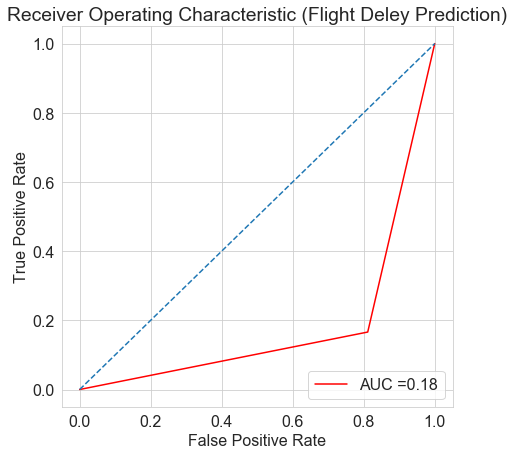

In [163]:
draw_roc(y_pred_mlp,y_test)

In [166]:
from sklearn.model_selection import GridSearchCV
grid_param={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}
clf_tree=DecisionTreeClassifier()
clf_cv=GridSearchCV(clf_tree,grid_param)

In [ ]:
clf_cv.fit(x_train,y_train)
y_pred_cv=clf_cv.predict(x_test)
print("----------------------------- Model Evaluation----------------------- ")
print('Model Accuracy ', accuracy_score(y_pred_cv, y_test))
print("----------------------------- Model Evaluation----------------------- ")
print("Recall Score ",recall_score(y_pred_cv, y_test))
print("----------------------------- Model Evaluation----------------------- ")
print("Precssion Score ",precision_score(y_pred_lr, y_test))
print("----------------------------- Model Evaluation----------------------- ")
print("Roc AUC Score ",roc_auc_score(y_pred_cv, y_test))

C:\Users\S727953\AppData\Local\Continuum\anaconda3\envs\MLND_AI\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [ ]:
draw_roc(y_pred_cv,y_test)